# Lab02: Gradient Descent.

- Student ID: 21127112
- Student name: Triệu Nhật Minh

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Gradient descent.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [432]:
# generate a 2-class classification problem with 1,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
-- allows us to treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [433]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    return x * (1 - x)

#### Compute output

In [434]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    return sigmoid_activation(X.dot(W))
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    #preds=?
    preds = sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [435]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [436]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient = trainX.T.dot(error * sigmoid_deriv(h))
    return gradient

#### Training function 

In [437]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h = compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [438]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=212.1097751
Epoch=5, loss=4.7726485
Epoch=10, loss=2.2354644
Epoch=15, loss=1.0509324
Epoch=20, loss=0.6002173
Epoch=25, loss=0.4103688
Epoch=30, loss=0.3130187
Epoch=35, loss=0.2554216
Epoch=40, loss=0.2179178
Epoch=45, loss=0.1918615
Epoch=50, loss=0.1729324
Epoch=55, loss=0.1587480
Epoch=60, loss=0.1478864
Epoch=65, loss=0.1394405
Epoch=70, loss=0.1327983
Epoch=75, loss=0.1275266
Epoch=80, loss=0.1233062
Epoch=85, loss=0.1198956
Epoch=90, loss=0.1171084
Epoch=95, loss=0.1147996
Epoch=100, loss=0.1128563


#### Evaluate result

In [439]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



**TODO: Study about accuracy, recall, precision, f1-score.**
- Accuracy: This is the ratio of the correctly predicted instances to the total instances in the dataset. It is a useful measure only when the class distribution is similar. In this report, the accuracy is 1.0, which means that the model is 100% accurate.
- Recall: It is the ratio of correctly predicted positive instances to the all the positive instances. In this report, the recall is 1.0, which means that the model is 100% accurate.
- Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. It's important when the cost of false positives is high. In this report, the precision is 1.0, which means that the model is 100% accurate.
- F1: This is the harmonic mean of Precision and Recall. It tries to find the balance between precision and recall. Obviously, the F1 score is 1.0.

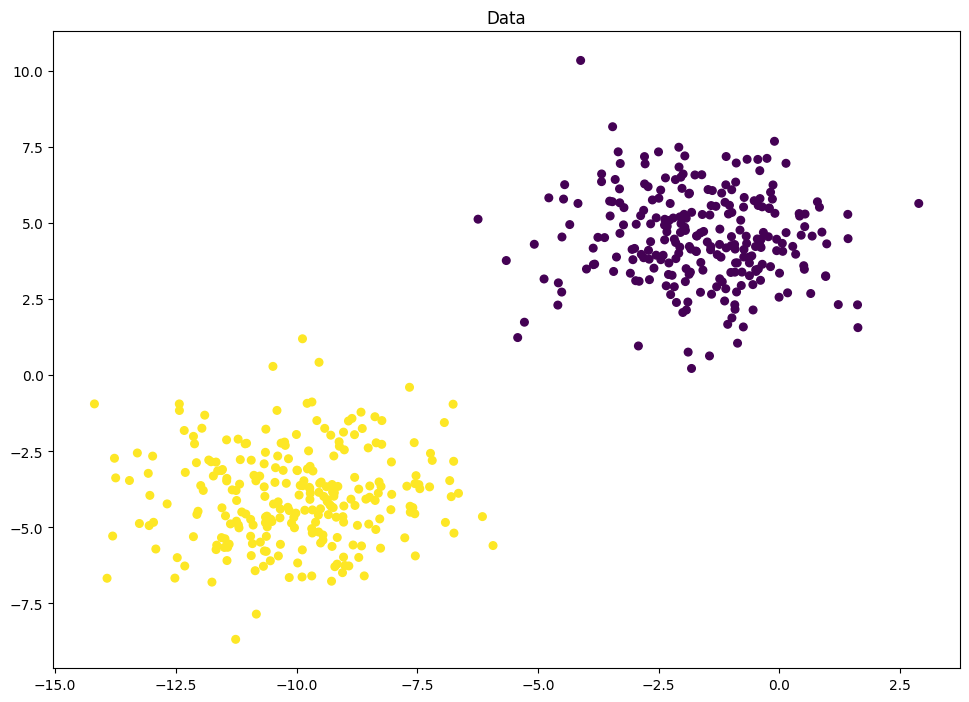

In [440]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

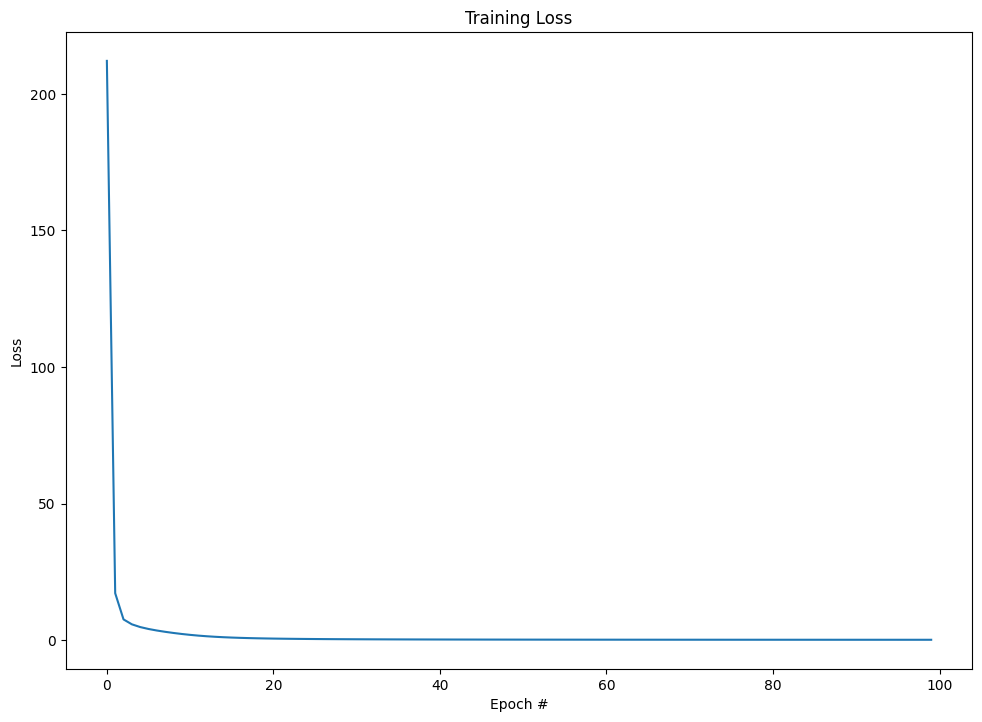

In [441]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observation**

#### Decreasing learning rates

- **Learning rate = 0.005**: At the initial iteration, the loss function is notably smaller than when the learning rate is set to 0.01, often by a factor of three. However, performance metrics like accuracy, recall, precision, and F1-score are comparable to those achieved with a learning rate of 0.01.

- **Learning rate = 0.0005**: As the number of epochs increases, the loss function tends to be significantly larger than when the learning rate is set to 0.01. When the epoch count nears 100, the learning rates of 0.01 and 0.005 typically result in a loss function value less than 1. However, a learning rate of 0.0005 usually leads to a loss function value greater than 1. The model's accuracy, recall, precision, and F1-score remain consistent with a learning rate of 0.01.

- **Learning rate = 0.0000001**:  The rate at which the loss decreases becomes slower with each passing epoch, the plot from the curve becomes a straight line. This indicates that the learning rate is too small to make any significant progress in minimizing the loss function.

#### Increasing learning rates

- **Learning rate = 0.02**: The loss function is notably the same as when the learning rate is set to 0.01. Performance metrics like accuracy, recall, precision, and F1-score are comparable to those achieved with a learning rate of 0.01.

- **Learning rate = 0.2**: The stability of the loss function appears to decrease compared to when the learning rate is 0.01. However, performance metrics such as accuracy, recall, precision, and F1-score are similar to the results obtained with a learning rate of 0.01.

- **Learning rate = 0.5**: With each epoch, the speed of the loss reduction increases. This suggests that the model is learning and adjusting its parameters more rapidly. It's important to monitor the model's performance to ensure it's not overshooting the optimal solution. The model's accuracy is decreased to 0.99, which means the model's performance has slightly declined compared to the optimal learning rate. Therefore, while a higher learning rate can speed up learning, it can also lead to suboptimal performance if not properly controlled.

#### Conclusion

To sum up, the learning rate has a profound effect on the model's performance and stability. A learning rate of 0.1 appears to strike an optimal balance between the speed of convergence and the stability of the loss function.

**Lower** learning rates, such as 0.005, 0.0005, and 0.0000001, result in a more gradual convergence, with the loss function decreasing at a slower pace with each epoch. Specifically, a learning rate of 0.0000001 is so small that it barely makes any noticeable progress in minimizing the loss function, causing the plot from the curve to appear as a straight line.

**Higher** learning rates, like 0.2 and 0.5, lead to quicker convergence but may also introduce instability into the learning process. The stability of the loss function seems to diminish when the learning rate is 0.2, and while a learning rate of 0.5 accelerates the reduction of loss, it's crucial to keep an eye on the model's performance to prevent it from bypassing the optimal solution.

In terms of performance metrics such as accuracy, recall, precision, and F1-score, all the tested learning rates yielded results comparable to a learning rate of 0.1. This indicates that while the learning rate affects the speed and stability of learning, it doesn't significantly impact the final performance of the model on these metrics.

### References
1. [Gradient Descent - Machine Learning cơ bản](https://machinelearningcoban.com/2017/01/12/gradientdescent/)
2. [Cy30mk3v - GitHub](https://github.com/Cy30mk3v/Intro2ML/blob/master/Lab02-GradientDescent.ipynb)
3. [IceIce1ce - GitHub](https://github.com/IceIce1ce/Lab-Gradient-Descent-HCMUS/blob/main/Lab02-GradientDescent.ipynb)